In [70]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import datetime as dt
from os import listdir
import json
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from PIL import Image, ImageDraw
from math import ceil


In [3]:
log = open("1008_web/asdf.txt", "r").readlines()
ids = open("1008_web/id.txt",   "r").readlines()

In [4]:
count = 0
pc = []


for l in log:
#     print(l.split(',')[2])
    try:
        pc.append(dt.datetime.strptime(l.split(',')[2][:-1], '%a %b  %d %H:%M:%S %Y') )
    except:
        print(l, count)
    count +=1 
print(count, '\t', log[0])#, times)

416 	 80,1350,Thu Oct  8 19:43:17 2020



In [5]:
phone = []
count = 0
for l in ids:
#     print(l.split(',')[2])
#     print(l.split('.')[0].split("e_")[1])
    try:
        phone.append(dt.datetime.strptime(l.split('.')[0].split("e_")[1], '%Y%m%d_%H%M%S') )
    except:
        print(l, count)
    count +=1 
print(count, '\t', ids[0])

417 	 VeggieCamera_crops_device_20201008_194154.json



In [6]:
new = []
for eachimgTime in phone:
    dis = dt.timedelta(0, 999999)
    a = None
    for eachpcTime in pc:
        if dis > abs(eachimgTime- eachpcTime):
            dis = abs(eachimgTime- eachpcTime)
            a = eachpcTime
    if dt.timedelta(0,5) > dis:
        if a > dt.datetime(2020, 10, 6, 15, 0, 0):
            new.append([eachimgTime, a, dis])

In [8]:
c = 0
cc = 0
for (imgTime, pcTime, _) in new:
    imgfname_json = imgTime.strftime("VeggieCamera_crops_device_%Y%m%d_%H%M%S.json")
    imgfname_rgbs = imgTime.strftime("VeggieCamera_crops_picture_%Y%m%d_%H%M%S.jpg")
    c+=1
    print(c, os.path.isfile("1008_web/json/"+imgfname_json), os.path.isfile("1008_web/jpg/"+imgfname_rgbs), imgfname_rgbs)
    if (os.path.isfile("1008_web/json/"+imgfname_json)and os.path.isfile("1008_web/jpg/"+imgfname_rgbs)):
        cc+=1

s = listdir("1008_web/jpg/")

jpgs = []
count = 0
for l in ids:
#     print(l.split(',')[2])
#     print(l.split('.')[0].split("e_")[1])
    try:
        jpgs.append(dt.datetime.strptime(l.split('.')[0].split("e_")[1], '%Y%m%d_%H%M%S') )
    except:
        print(l, count)
    count +=1 
print(count, '\t', jpgs[0])


1 True True VeggieCamera_crops_picture_20201008_194318.jpg
2 True True VeggieCamera_crops_picture_20201008_194326.jpg
3 True True VeggieCamera_crops_picture_20201008_194334.jpg
4 True True VeggieCamera_crops_picture_20201008_194342.jpg
5 True True VeggieCamera_crops_picture_20201008_194350.jpg
6 True True VeggieCamera_crops_picture_20201008_194358.jpg
7 True True VeggieCamera_crops_picture_20201008_194406.jpg
8 True True VeggieCamera_crops_picture_20201008_194414.jpg
9 True True VeggieCamera_crops_picture_20201008_194447.jpg
10 True True VeggieCamera_crops_picture_20201008_194455.jpg
11 True True VeggieCamera_crops_picture_20201008_194503.jpg
12 True True VeggieCamera_crops_picture_20201008_194511.jpg
13 True True VeggieCamera_crops_picture_20201008_194519.jpg
14 True True VeggieCamera_crops_picture_20201008_194527.jpg
15 True True VeggieCamera_crops_picture_20201008_194535.jpg
16 True True VeggieCamera_crops_picture_20201008_194543.jpg
17 True True VeggieCamera_crops_picture_20201008_

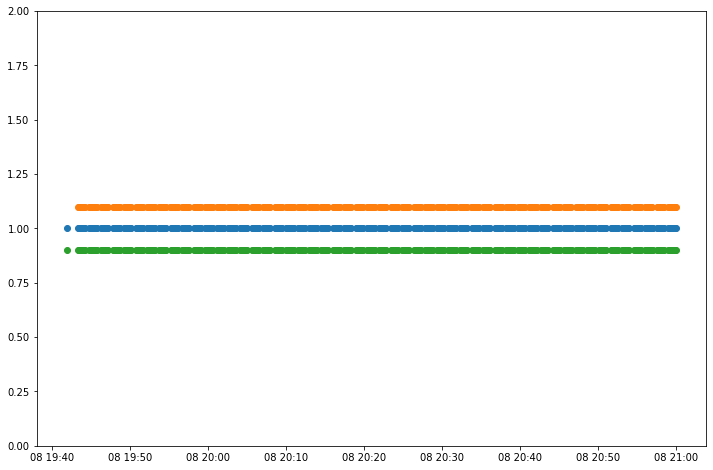

In [9]:
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
import datetime

fig, ax = plt.subplots(figsize=(12,8))

plt.plot_date(phone, [1]*len(phone))
plt.plot_date(pc, [1.1]*len(pc))

plt.plot_date(jpgs, [0.9]*len(jpgs))
plt.ylim([0, 2])

plt.show()

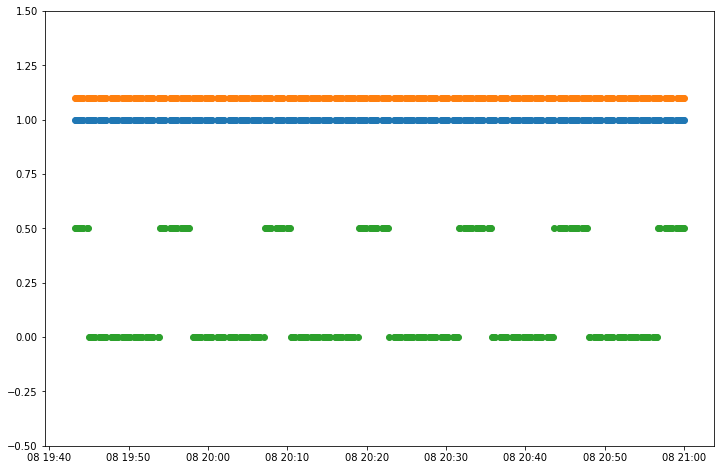

In [10]:
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
import datetime

fig, ax = plt.subplots(figsize=(12,8))

_pc_ = []
_ph_ = []
____ = []
for n in new:
    _pc_.append(n[1])
    _ph_.append(n[0])
    ____.append(n[2].total_seconds()/2)
plt.plot_date(_pc_, [1]*len(_pc_))
plt.plot_date(_ph_, [1.1]*len(_pc_))
plt.plot_date(_pc_, ____)

plt.ylim([-.5, 1.5])

plt.show()

In [59]:
_ph_img_jpgs_  = []
_ph_img_jsons_ = []
_ph_img_jsons_pitch = []
_pc_zenith     = []
_pc_camang     = []

c  = 0
cc = 0
ccc= 0
for (imgTime, pcTime, _) in new:
    imgfname_json = imgTime.strftime("VeggieCamera_crops_device_%Y%m%d_%H%M%S.json")
    imgfname_rgbs = imgTime.strftime("VeggieCamera_crops_picture_%Y%m%d_%H%M%S.jpg")
    c+=1
    #     print(c, os.path.isfile("1006/jsons/"+imgfname_json), os.path.isfile("1006/jpgs/"+imgfname_rgbs), imgfname_rgbs)
    if (os.path.isfile("1008_web/json/"+imgfname_json)and os.path.isfile("1008_web/jpg/"+imgfname_rgbs)):
        cc+=1
        _ph_img_jpgs_.append("1008_web/jpg/"   + imgfname_rgbs)
        _ph_img_jsons_.append("1008_web/json/" + imgfname_json)
        
        tmp_dict = json.loads(open("1008_web/json/" + imgfname_json, 'r').read())
        _ph_img_jsons_pitch.append(float(tmp_dict['Pitch']))

        
        
        tmp = pcTime.strftime('%H:%M:%S %Y')
        for __log__ in log:
            if tmp in __log__:
                print(__log__)
                ccc+=1
                _pc_zenith.append(float(__log__.split(',')[0]))
                _pc_camang.append(  int(__log__.split(',')[1]))
                
print(c, cc, ccc)
print(_pc_camang)

80,1350,Thu Oct  8 19:43:17 2020

80,1360,Thu Oct  8 19:43:25 2020

80,1370,Thu Oct  8 19:43:33 2020

80,1380,Thu Oct  8 19:43:41 2020

80,1390,Thu Oct  8 19:43:49 2020

80,1400,Thu Oct  8 19:43:57 2020

80,1410,Thu Oct  8 19:44:05 2020

80,1420,Thu Oct  8 19:44:13 2020

79.4,1320,Thu Oct  8 19:44:46 2020

79.4,1330,Thu Oct  8 19:44:54 2020

79.4,1340,Thu Oct  8 19:45:03 2020

79.4,1350,Thu Oct  8 19:45:11 2020

79.4,1360,Thu Oct  8 19:45:19 2020

79.4,1370,Thu Oct  8 19:45:27 2020

79.4,1380,Thu Oct  8 19:45:35 2020

79.4,1390,Thu Oct  8 19:45:43 2020

76.0,1320,Thu Oct  8 19:46:16 2020

76.0,1330,Thu Oct  8 19:46:24 2020

76.0,1340,Thu Oct  8 19:46:32 2020

76.0,1350,Thu Oct  8 19:46:40 2020

76.0,1360,Thu Oct  8 19:46:48 2020

76.0,1370,Thu Oct  8 19:46:56 2020

76.0,1380,Thu Oct  8 19:47:04 2020

76.0,1390,Thu Oct  8 19:47:12 2020

72.6,1310,Thu Oct  8 19:47:45 2020

72.6,1320,Thu Oct  8 19:47:53 2020

72.6,1330,Thu Oct  8 19:48:01 2020

72.6,1340,Thu Oct  8 19:48:09 2020

72.6,135

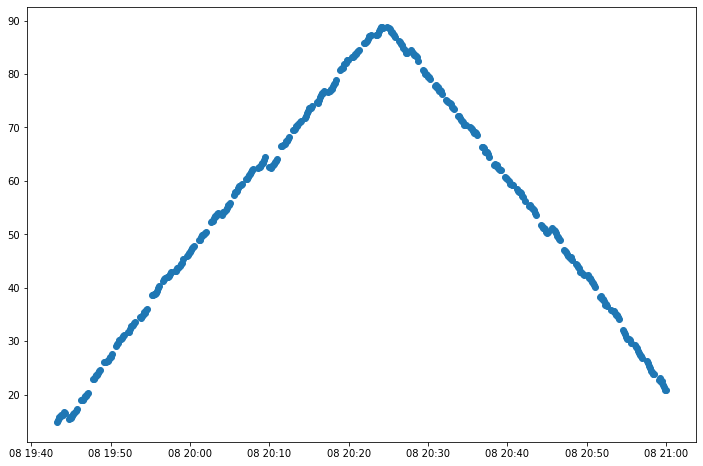

In [34]:

fig, ax = plt.subplots(figsize=(12,8))
plt.plot_date(_pc_,_ph_img_jsons_pitch)

def cropper(orig_1920_1080):
    t = np.flip(np.asarray(orig_1920_1080),axis=0) #dtype=np.int16
    return t[400:1400, :,:]

In [14]:
len(_pc_), len(_ph_img_jsons_pitch)

(416, 0)

25.0
	 100
	 200
	 300
	 400
	 500
	 600
	 700
	 800
	 900
	 1000
	 1100
	 1200


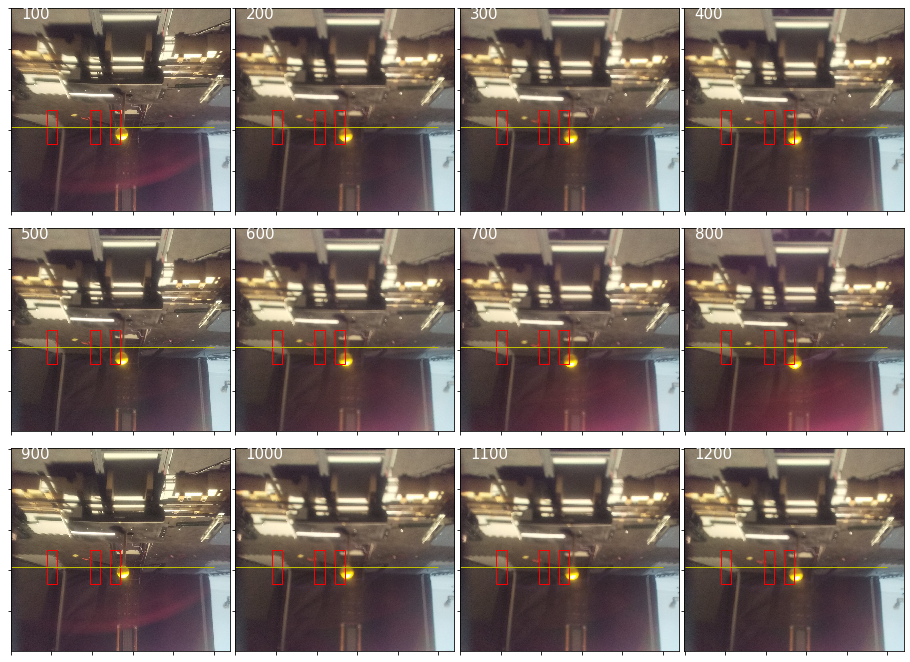

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


KeyboardInterrupt: 

In [71]:
index = 0
z2cangle = []
for _z in range(250, -900, -34):
    _z_ = _z/10
    print(_z_)
    batch = []
#     f, axarr = plt.subplots(3,4, figsize=(20,10)) 

#     #     plt.figure(figsize = (4,4))
#     gs1 = gridspec.GridSpec(3, 4)
#     gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 


    plt.figure(figsize = (16,16))
    gs1 = gridspec.GridSpec(4, 4)
    gs1.update(wspace=0.025, hspace=0.05)    
    
    for _cangle in range(100, 1201, 100):
        
        print('\t', _cangle)
        batch.append(index)
        img = cropper(mpimg.imread(_ph_img_jpgs_[index]))
#         plt.imshow(img)
#         plt.show()
        # use the created array to output your multiple images. In this case I have stacked 4 images vertically
#         print(_cangle, _cangle//100-1, (_cangle//100-1)//6)
#         axarr[(_cangle//100-1)//4, (_cangle//100-1)%4].imshow(img)
        
#         rect = patches.Rectangle((180, 500), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
#         axarr[(_cangle//100-1)//4, (_cangle//100-1)%4].add_patch(rect)
#         print(_ph_img_jpgs_[index])
        
        ax1 = plt.subplot(gs1[_cangle//100-1])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        ax1.imshow(img)
        
        rect1 = patches.Rectangle((180, 500), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
        rect2 = patches.Rectangle((390, 500), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
        rect3 = patches.Rectangle((490, 500), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
        rect_ = patches.Rectangle((0, 500+170//2), 1000, 1,linewidth=1,edgecolor='y',facecolor='none')
        ax1.add_patch(rect1)
        ax1.add_patch(rect2)
        ax1.add_patch(rect3)
        ax1.add_patch(rect_)
        ax1.text(50, 50, str(_cangle), fontsize=15, c = 'w')
        
        
        index +=1
    plt.show()
    print(batch)
    z2cangle = int(input("which index"))

80.0 [1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420] 8


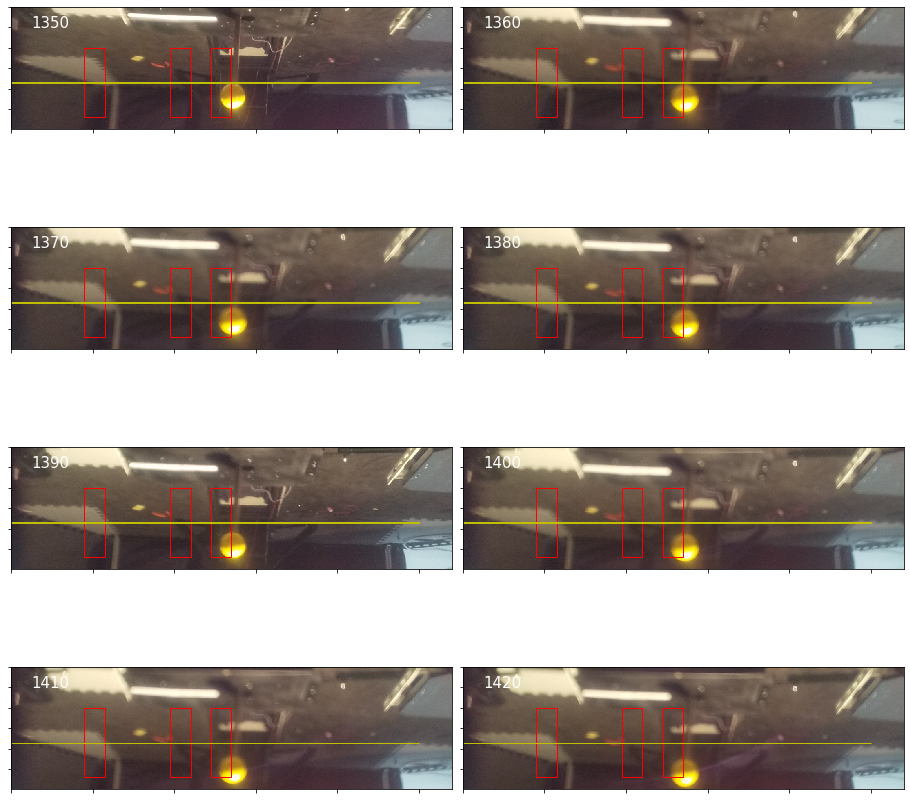

which index1000-1350
79.4 [1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390] 8


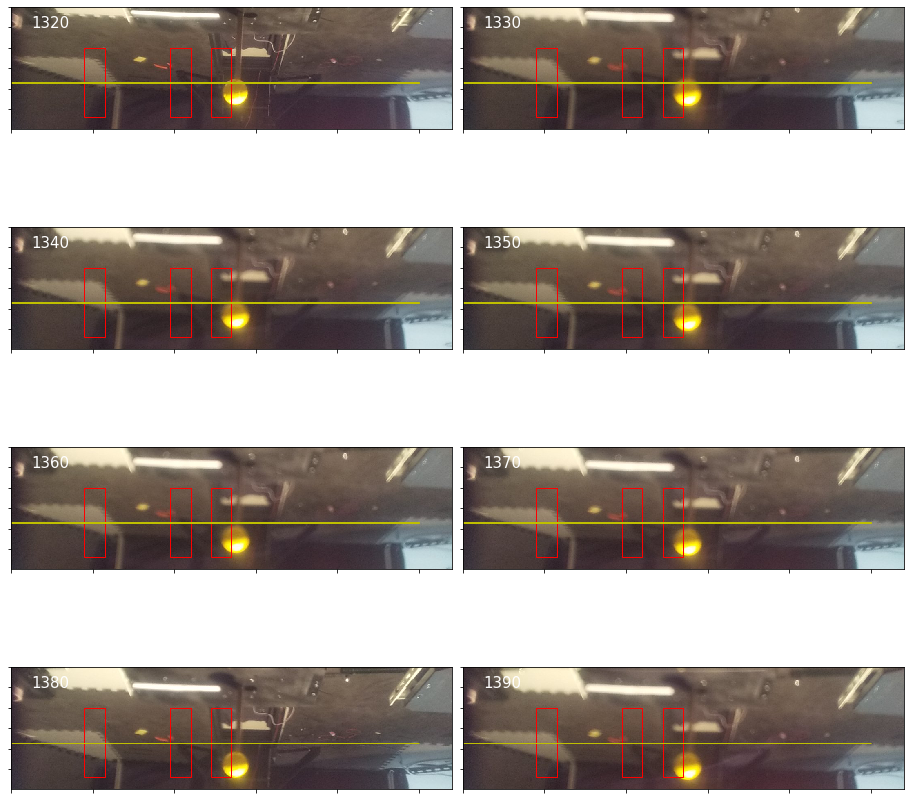

which index1000-1300
76.0 [1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390] 8


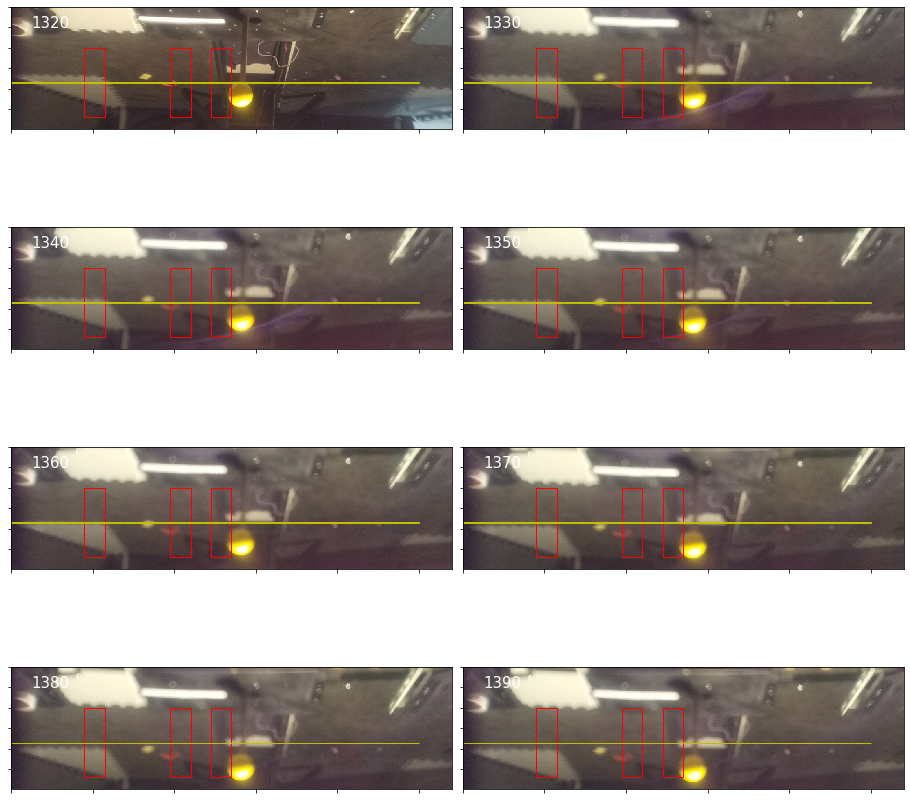

In [ ]:
index = 0
z2cangle = []

tmpcamangle = []
tmpcamangle_i = []

for i in range(len(_pc_zenith)-1):
    ze = _pc_zenith[i]
    tmpcamangle.append(_pc_camang[i])
    tmpcamangle_i.append(i)
    if ze != _pc_zenith[i+1]:
        numCamAng = len(tmpcamangle)
        print(ze, tmpcamangle, numCamAng)
        
        plt.figure(figsize = (16,16))
        gs1 = gridspec.GridSpec(ceil(numCamAng//2), 2)
        gs1.update(wspace=0.025, hspace=0.05)    

        for ii in range(numCamAng):
#             _cangle = _pc_camang[index]
#             print('\t', _cangle)
#             batch.append(index)
            img = cropper(mpimg.imread(_ph_img_jpgs_[tmpcamangle_i[ii]]))
            ax1 = plt.subplot(gs1[ii])
            plt.axis('on')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            ax1.set_aspect('equal')
            ax1.imshow(img[400:700,:,:])

            rect1 = patches.Rectangle((180, 500-400), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
            rect2 = patches.Rectangle((390, 500-400), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
            rect3 = patches.Rectangle((490, 500-400), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
            rect_ = patches.Rectangle((0, 500-400+170//2), 1000, 1,linewidth=1,edgecolor='y',facecolor='none')
            ax1.add_patch(rect1)
            ax1.add_patch(rect2)
            ax1.add_patch(rect3)
            ax1.add_patch(rect_)
            ax1.text(50, 50, str(tmpcamangle[ii]), fontsize=15, c = 'w')

            index +=1
        
        
        
        tmpcamangle = []
        tmpcamangle_i= []
        plt.show()
        #         print(batch)
        tmp = input("which index")
        z2cangle.append([ze,tmp])
    

'''
for _z in range(794, -901, -34):
    _z_ = _z/10
    print(_z_)
    batch = 
    
    plt.figure(figsize = (16,16))
    gs1 = gridspec.GridSpec(8, 2)
    gs1.update(wspace=0.025, hspace=0.05)    
    
    for j_cangle in range(8):
        _cangle = _pc_camang[index]
        #         _pc_zenith     = []
        
        print('\t', _cangle)
        batch.append(index)
        img = cropper(mpimg.imread(_ph_img_jpgs_[index]))
        ax1 = plt.subplot(gs1[j_cangle])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        ax1.imshow(img[400:700,:,:])
        
        rect1 = patches.Rectangle((180, 500-400), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
        rect2 = patches.Rectangle((390, 500-400), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
        rect3 = patches.Rectangle((490, 500-400), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
        rect_ = patches.Rectangle((0, 500-400+170//2), 1000, 1,linewidth=1,edgecolor='y',facecolor='none')
        ax1.add_patch(rect1)
        ax1.add_patch(rect2)
        ax1.add_patch(rect3)
        ax1.add_patch(rect_)
        ax1.text(50, 50, str(_cangle), fontsize=15, c = 'w')
        
        index +=1
        

        #     for _cangle in range(100, 1201, 100):

        #         print('\t', _cangle)
        #         batch.append(index)
        #         img = cropper(mpimg.imread(_ph_img_jpgs_[index]))
        # #         plt.imshow(img)
        # #         plt.show()
        #         # use the created array to output your multiple images. In this case I have stacked 4 images vertically
        # #         print(_cangle, _cangle//100-1, (_cangle//100-1)//6)
        # #         axarr[(_cangle//100-1)//4, (_cangle//100-1)%4].imshow(img)

        # #         rect = patches.Rectangle((180, 500), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
        # #         axarr[(_cangle//100-1)//4, (_cangle//100-1)%4].add_patch(rect)
        # #         print(_ph_img_jpgs_[index])

        #         ax1 = plt.subplot(gs1[_cangle//100-1])
        #         plt.axis('on')
        #         ax1.set_xticklabels([])
        #         ax1.set_yticklabels([])
        #         ax1.set_aspect('equal')
        #         ax1.imshow(img[400:700,:,:])

        #         rect1 = patches.Rectangle((180, 500-400), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
        #         rect2 = patches.Rectangle((390, 500-400), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
        #         rect3 = patches.Rectangle((490, 500-400), 50, 170,linewidth=1,edgecolor='r',facecolor='none')
        #         rect_ = patches.Rectangle((0, 500-400+170//2), 1000, 1,linewidth=1,edgecolor='y',facecolor='none')
        #         ax1.add_patch(rect1)
        #         ax1.add_patch(rect2)
        #         ax1.add_patch(rect3)
        #         ax1.add_patch(rect_)
        #         ax1.text(50, 50, str(_cangle), fontsize=15, c = 'w')

        #         index +=1
    plt.show()
    print(batch)
    tmp = int(input("which index"))
    z2cangle.append([_z_,tmp])
    
'''

[[79.4, 1350],
 [76.0, 1320],
 [72.6, 1320],
 [69.2, 1310],
 [65.8, 1300],
 [62.4, 1270],
 [59.0, 1250],
 [55.6, 1220],
 [52.2, 1210],
 [48.8, 1200],
 [45.4, 1150],
 [42.0, 1130],
 [38.6, 1110],
 [35.2, 1090],
 [31.8, 1080],
 [28.4, 1050],
 [25.0, 1040],
 [21.6, 1020],
 [18.2, 1020],
 [14.8, 1000],
 [11.4, 980],
 [8.0, 940],
 [4.6, 930],
 [1.2, 920],
 [-2.2, 900],
 [-5.6, 880],
 [-9.0, 850],
 [-12.4, 830],
 [-15.8, 800],
 [-19.2, 780],
 [-22.6, 760],
 [-26.0, 730],
 [-29.4, 690],
 [-32.8, 670],
 [-36.2, 650],
 [-39.6, 630],
 [-43.0, 590],
 [-46.4, 570],
 [-49.8, 540],
 [-53.2, 520],
 [-56.6, 500],
 [-60.0, 470],
 [-63.4, 440],
 [-66.8, 430],
 [-70.2, 410],
 [-73.6, 390],
 [-77.0, 370],
 [-80.4, 340],
 [-83.8, 300],
 [-87.2, 280]]

0


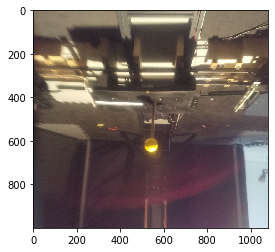

11


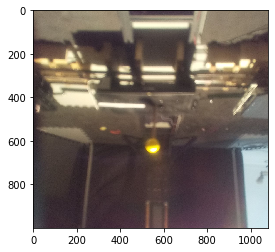

16


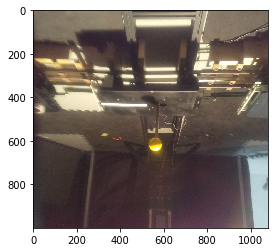

25


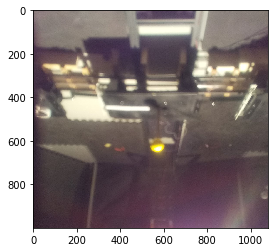

33


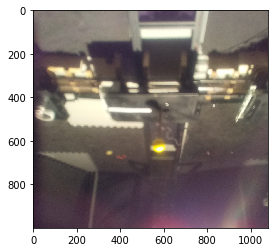

43


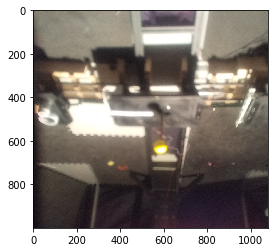

50


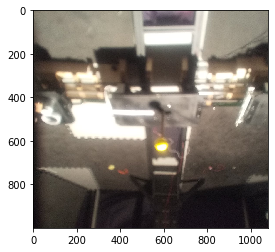

59


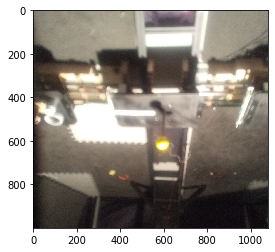

65


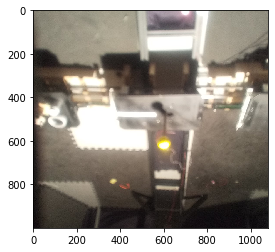

73


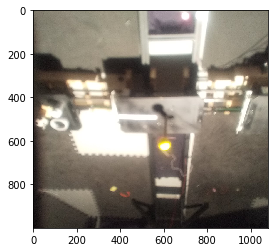

92


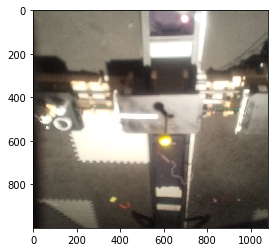

99


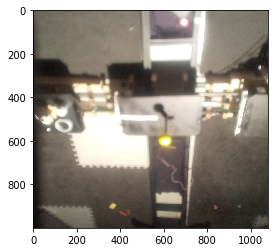

108


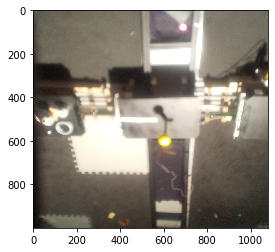

119


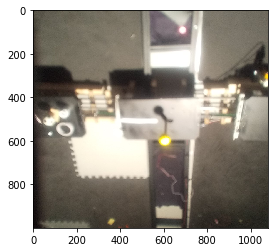

127


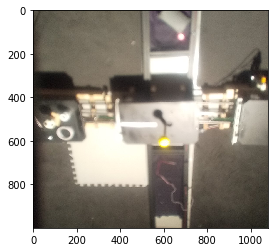

133


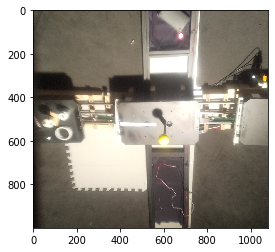

158


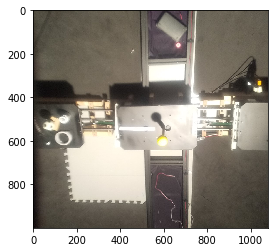

166


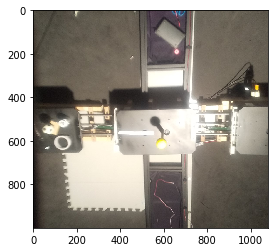

199


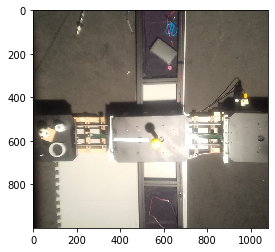

335


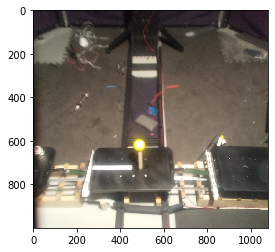

405


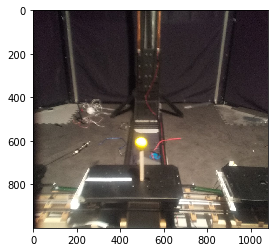

414


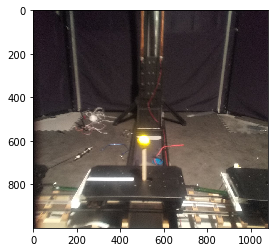

In [48]:
for _z,_c in z2cangle:
    for j in range(len(_pc_zenith)): #_pc_camang
        if abs(_z - _pc_zenith[j])<1 and _pc_camang[j] == _c:
            print(j)
            img = cropper(mpimg.imread(_ph_img_jpgs_[j]))
            image = Image.fromarray(img)
            draw = ImageDraw.Draw(image)
            draw.rectangle((490, 500, 490+50, 500+170), outline=(255, 255, 0), width=3)
            draw.rectangle((390, 500, 390+50, 500+170), outline=(255, 255, 0), width=3)
            draw.rectangle((180, 500, 180+50, 500+170), outline=(255, 255, 0), width=3)
            draw.rectangle((0, 585, 1000, 585), outline=(0, 255, 0), width=3)
            image.save("1008_gif/" + str(j) + '_' + str(_ph_img_jsons_pitch[j]) + ".jpg")
            plt.imshow(img)
            plt.show()

In [63]:
for _z,_c in z2cangle:
    for j in range(len(_pc_zenith)):
        if abs(_z - _pc_zenith[j])<1 :
            print(_z, _pc_camang[j], end ='\t')
            if(_pc_camang[j] == _c):
                print("yep")
            else:
                print()
                

    print()
                

79.4 1350	yep
79.4 1360	
79.4 1370	
79.4 1380	
79.4 1390	
79.4 1400	
79.4 1410	
79.4 1420	
79.4 1320	
79.4 1330	
79.4 1340	
79.4 1350	yep
79.4 1360	
79.4 1370	
79.4 1380	
79.4 1390	

76.0 1320	yep
76.0 1330	
76.0 1340	
76.0 1350	
76.0 1360	
76.0 1370	
76.0 1380	
76.0 1390	

72.6 1310	
72.6 1320	yep
72.6 1330	
72.6 1340	
72.6 1350	
72.6 1360	
72.6 1370	
72.6 1380	

69.2 1300	
69.2 1310	yep
69.2 1320	
69.2 1330	
69.2 1340	
69.2 1350	
69.2 1360	
69.2 1370	

65.8 1270	
65.8 1280	
65.8 1290	
65.8 1300	yep
65.8 1310	
65.8 1320	
65.8 1330	
65.8 1340	

62.4 1250	
62.4 1260	
62.4 1270	yep
62.4 1280	
62.4 1290	
62.4 1300	
62.4 1310	
62.4 1320	

59.0 1220	
59.0 1230	
59.0 1240	
59.0 1250	yep
59.0 1260	
59.0 1270	
59.0 1280	
59.0 1290	

55.6 1210	
55.6 1220	yep
55.6 1230	
55.6 1240	
55.6 1250	
55.6 1260	
55.6 1270	
55.6 1280	

52.2 1200	
52.2 1210	yep
52.2 1220	
52.2 1230	
52.2 1240	
52.2 1250	
52.2 1260	
52.2 1270	

48.8 1120	
48.8 1130	
48.8 1140	
48.8 1150	
48.8 1160	
48.8 1170	
48.8 1180	
48.8

In [39]:
len(z2cangle)

50

In [46]:
z2cangle_ = []
for i in range(len(z2cangle)-1):
    z2cangle_.append([z2cangle[i][0],z2cangle[i+1][1]])

In [45]:
z2cangle = [[79.4, 1350],
 [76.0, 1320],
 [72.6, 1320],
 [69.2, 1310],
 [65.8, 1300],
 [62.4, 1270],
 [59.0, 1250],
 [55.6, 1220],
 [52.2, 1210],
 [48.8, 1200],
 [45.4, 1150],
 [42.0, 1130],
 [38.6, 1110],
 [35.2, 1090],
 [31.8, 1080],
 [28.4, 1050],
 [25.0, 1040],
 [21.6, 1020],
 [18.2, 1020],
 [14.8, 1000],
 [11.4, 980],
 [8.0, 940],
 [4.6, 930],
 [1.2, 920],
 [-2.2, 900],
 [-5.6, 880],
 [-9.0, 850],
 [-12.4, 830],
 [-15.8, 800],
 [-19.2, 780],
 [-22.6, 760],
 [-26.0, 730],
 [-29.4, 690],
 [-32.8, 670],
 [-36.2, 650],
 [-39.6, 630],
 [-43.0, 590],
 [-46.4, 570],
 [-49.8, 540],
 [-53.2, 520],
 [-56.6, 500],
 [-60.0, 470],
 [-63.4, 440],
 [-66.8, 430],
 [-70.2, 410],
 [-73.6, 390],
 [-77.0, 370],
 [-80.4, 340],
 [-83.8, 300],
 [-87.2, 280]]

In [47]:
z2cangle_

[[79.4, 1320],
 [76.0, 1320],
 [72.6, 1310],
 [69.2, 1300],
 [65.8, 1270],
 [62.4, 1250],
 [59.0, 1220],
 [55.6, 1210],
 [52.2, 1200],
 [48.8, 1150],
 [45.4, 1130],
 [42.0, 1110],
 [38.6, 1090],
 [35.2, 1080],
 [31.8, 1050],
 [28.4, 1040],
 [25.0, 1020],
 [21.6, 1020],
 [18.2, 1000],
 [14.8, 980],
 [11.4, 940],
 [8.0, 930],
 [4.6, 920],
 [1.2, 900],
 [-2.2, 880],
 [-5.6, 850],
 [-9.0, 830],
 [-12.4, 800],
 [-15.8, 780],
 [-19.2, 760],
 [-22.6, 730],
 [-26.0, 690],
 [-29.4, 670],
 [-32.8, 650],
 [-36.2, 630],
 [-39.6, 590],
 [-43.0, 570],
 [-46.4, 540],
 [-49.8, 520],
 [-53.2, 500],
 [-56.6, 470],
 [-60.0, 440],
 [-63.4, 430],
 [-66.8, 410],
 [-70.2, 390],
 [-73.6, 370],
 [-77.0, 340],
 [-80.4, 300],
 [-83.8, 280]]

In [64]:
z2cangle_

[[79.4, 1320],
 [76.0, 1320],
 [72.6, 1310],
 [69.2, 1300],
 [65.8, 1270],
 [62.4, 1250],
 [59.0, 1220],
 [55.6, 1210],
 [52.2, 1200],
 [48.8, 1150],
 [45.4, 1130],
 [42.0, 1110],
 [38.6, 1090],
 [35.2, 1080],
 [31.8, 1050],
 [28.4, 1040],
 [25.0, 1020],
 [21.6, 1020],
 [18.2, 1000],
 [14.8, 980],
 [11.4, 940],
 [8.0, 930],
 [4.6, 920],
 [1.2, 900],
 [-2.2, 880],
 [-5.6, 850],
 [-9.0, 830],
 [-12.4, 800],
 [-15.8, 780],
 [-19.2, 760],
 [-22.6, 730],
 [-26.0, 690],
 [-29.4, 670],
 [-32.8, 650],
 [-36.2, 630],
 [-39.6, 590],
 [-43.0, 570],
 [-46.4, 540],
 [-49.8, 520],
 [-53.2, 500],
 [-56.6, 470],
 [-60.0, 440],
 [-63.4, 430],
 [-66.8, 410],
 [-70.2, 390],
 [-73.6, 370],
 [-77.0, 340],
 [-80.4, 300],
 [-83.8, 280]]